<a href="https://colab.research.google.com/github/ucchol/Applied-Cognitive-Modeling-CS--5390/blob/main/Final%20Project_Insider%20Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pyibl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from pyibl import Agent
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
# Assign attributes values to hosts
# m-prob: probability the host is monitored
# r-value: reward received when successfully attacked
# p-value: penalty received when failed attack
R1T1 = {"r-value": 2, "p-value": -1, "m-prob": 0.22}
R1T2 = {"r-value": 8, "p-value": -5, "m-prob": 0.51}
R1T3 = {"r-value": 9, "p-value": -9, "m-prob": 0.42}
R1T4 = {"r-value": 9, "p-value": -10, "m-prob": 0.4}
R1T5 = {"r-value": 2, "p-value": -6, "m-prob": 0.08}
R1T6 = {"r-value": 5, "p-value": -5, "m-prob": 0.36}

R2T1 = {"r-value": 5, "p-value": -3, "m-prob": 0.41}
R2T2 = {"r-value": 8, "p-value": -5, "m-prob": 0.48}
R2T3 = {"r-value": 7, "p-value": -6, "m-prob": 0.41}
R2T4 = {"r-value": 8, "p-value": -9, "m-prob": 0.37}
R2T5 = {"r-value": 5, "p-value": -7, "m-prob": 0.27}
R2T6 = {"r-value": 2, "p-value": -4, "m-prob": 0.05}

R3T1 = {"r-value": 3, "p-value": -3, "m-prob": 0.3}
R3T2 = {"r-value": 9, "p-value": -4, "m-prob": 0.6}
R3T3 = {"r-value": 6, "p-value": -6, "m-prob": 0.4}
R3T4 = {"r-value": 5, "p-value": -8, "m-prob": 0.29}
R3T5 = {"r-value": 3, "p-value": -6, "m-prob": 0.2}
R3T6 = {"r-value": 2, "p-value": -2, "m-prob": 0.2}

R4T1 = {"r-value": 4, "p-value": -3, "m-prob": 0.37}
R4T2 = {"r-value": 6, "p-value": -3, "m-prob": 0.51}
R4T3 = {"r-value": 7, "p-value": -7, "m-prob": 0.4}
R4T4 = {"r-value": 5, "p-value": -10, "m-prob": 0.24}
R4T5 = {"r-value": 5, "p-value": -9, "m-prob": 0.26}
R4T6 = {"r-value": 3, "p-value": -4, "m-prob": 0.23}

# choices for 4 rounds
round1_choices = [R1T1, R1T2, R1T3, R1T4, R1T5, R1T6]
round2_choices = [R2T1, R2T2, R2T3, R2T4, R2T5, R2T6]
round3_choices = [R3T1, R3T2, R3T3, R3T4, R3T5, R3T6]
round4_choices = [R4T1, R4T2, R4T3, R4T4, R4T5, R4T6]

# list for round choices
rounds_choices = [round1_choices,round2_choices,round3_choices,round4_choices]

# Hard coded strategy
round1_strategy = {
    "1": {
        "cover": [2, 6],
        "signal": [3, 4]
    },
    "2": {
        "cover": [2, 4],
        "signal": [3, 6]
    },
    "3": {
        "cover": [2, 5],
        "signal": [3, 6]
    },
    "4": {
        "cover": [2, 4],
        "signal": [3, 5, 6]
    },
    "5": {
        "cover": [1, 3],
        "signal": [2, 6]
    },
    "6": {
        "cover": [2, 4],
        "signal": [3, 6]
    },
    "7": {
        "cover": [1, 3],
        "signal": [2, 4]
    },
    "8": {
        "cover": [1, 3],
        "signal": [2, 6]
    },
    "9": {
        "cover": [2, 4],
        "signal": [3, 6]
    },
    "10": {
        "cover": [2, 6],
        "signal": [1, 3, 4]
    },
    "11": {
        "cover": [2, 6],
        "signal": [3, 4]
    },
    "12": {
        "cover": [2, 4],
        "signal": [1, 3]
    },
    "13": {
        "cover": [1, 3],
        "signal": [4, 6]
    },
    "14": {
        "cover": [2, 4],
        "signal": [5]
    },
    "15": {
        "cover": [2, 4],
        "signal": [3, 6]
    },
    "16": {
        "cover": [1, 3],
        "signal": [2, 4]
    },
    "17": {
        "cover": [3, 6],
        "signal": [5]
    },
    "18": {
        "cover": [2, 4],
        "signal": [3]
    },
    "19": {
        "cover": [2, 4],
        "signal": [6]
    },
    "20": {
        "cover": [3, 6],
        "signal": [2, 4]
    },
    "21": {
        "cover": [1, 3],
        "signal": [2, 4]
    },
    "22": {
        "cover": [2, 4],
        "signal": []
    },
    "23": {
        "cover": [3, 6],
        "signal": [2, 4, 5]
    },
    "24": {
        "cover": [2, 4],
        "signal": [3]
    },
    "25": {
        "cover": [1, 3],
        "signal": [5, 6]
    }
}

round2_strategy = {
    "1": {
        "cover": [2, 5],
        "signal": [3, 4]
    },
    "2": {
        "cover": [1, 3],
        "signal": [2, 4]
    },
    "3": {
        "cover": [1, 3],
        "signal": [2, 4, 5]
    },
    "4": {
        "cover": [3, 6],
        "signal": [4, 5]
    },
    "5": {
        "cover": [1, 3],
        "signal": [4, 5]
    },
    "6": {
        "cover": [2, 4],
        "signal": [1, 3, 6]
    },
    "7": {
        "cover": [1, 3],
        "signal": [2]
    },
    "8": {
        "cover": [2, 4],
        "signal": [3]
    },
    "9": {
        "cover": [1, 3],
        "signal": [5]
    },
    "10": {
        "cover": [1, 4],
        "signal": []
    },
    "11": {
        "cover": [1, 3],
        "signal": [2, 5]
    },
    "12": {
        "cover": [1, 3],
        "signal": [2, 5]
    },
    "13": {
        "cover": [2, 5],
        "signal": [3, 4]
    },
    "14": {
        "cover": [1, 3],
        "signal": [2, 5]
    },
    "15": {
        "cover": [1, 3],
        "signal": [2, 4, 5]
    },
    "16": {
        "cover": [1, 3],
        "signal": [4, 5]
    },
    "17": {
        "cover": [2, 5],
        "signal": [3, 4]
    },
    "18": {
        "cover": [2, 4],
        "signal": [3, 5, 6]
    },
    "19": {
        "cover": [2, 4],
        "signal": [1, 5]
    },
    "20": {
        "cover": [1, 3],
        "signal": [2, 5]
    },
    "21": {
        "cover": [1, 3],
        "signal": [2]
    },
    "22": {
        "cover": [2, 4],
        "signal": [1, 5]
    },
    "23": {
        "cover": [2, 4],
        "signal": [1, 3, 5]
    },
    "24": {
        "cover": [3, 6],
        "signal": [4]
    },
    "25": {
        "cover": [2, 5],
        "signal": [1, 3, 4, 6]
    }
}

round3_strategy = {
    "1": {
        "cover": [2, 5],
        "signal": [1, 3, 6]
    },
    "2": {
        "cover": [3, 6],
        "signal": [2, 4]
    },
    "3": {
        "cover": [2, 4],
        "signal": []
    },
    "4": {
        "cover": [2, 5],
        "signal": [1, 3, 4]
    },
    "5": {
        "cover": [2, 5],
        "signal": [3]
    },
    "6": {
        "cover": [2, 6],
        "signal": [1, 4, 5]
    },
    "7": {
        "cover": [2, 6],
        "signal": [5]
    },
    "8": {
        "cover": [1, 3],
        "signal": [2, 4]
    },
    "9": {
        "cover": [2, 4],
        "signal": [1, 3, 5]
    },
    "10": {
        "cover": [1, 3],
        "signal": []
    },
    "11": {
        "cover": [2, 4],
        "signal": [1, 3, 5]
    },
    "12": {
        "cover": [1, 3],
        "signal": [2]
    },
    "13": {
        "cover": [1, 3],
        "signal": [2, 4, 5]
    },
    "14": {
        "cover": [2, 6],
        "signal": [5]
    },
    "15": {
        "cover": [2, 5],
        "signal": [3, 4]
    },
    "16": {
        "cover": [1, 3],
        "signal": [2, 4, 5, 6]
    },
    "17": {
        "cover": [2, 4],
        "signal": [1, 3, 5]
    },
    "18": {
        "cover": [1, 3],
        "signal": [2, 4, 6]
    },
    "19": {
        "cover": [2, 4],
        "signal": [1, 3]
    },
    "20": {
        "cover": [2, 5],
        "signal": [1, 4]
    },
    "21": {
        "cover": [2, 4],
        "signal": [5]
    },
    "22": {
        "cover": [2, 4],
        "signal": [3]
    },
    "23": {
        "cover": [2, 6],
        "signal": []
    },
    "24": {
        "cover": [1, 3],
        "signal": [2, 5, 6]
    },
    "25": {
        "cover": [2, 4],
        "signal": [1, 3, 5, 6]
    }
}

round4_strategy = {
    "1": {
        "cover": [2, 5],
        "signal": [6]
    },
    "2": {
        "cover": [1, 4],
        "signal": [3]
    },
    "3": {
        "cover": [3, 6],
        "signal": [2, 4]
    },
    "4": {
        "cover": [2, 6],
        "signal": [4, 5]
    },
    "5": {
        "cover": [1, 3],
        "signal": [6]
    },
    "6": {
        "cover": [1, 4],
        "signal": [3, 5]
    },
    "7": {
        "cover": [1, 3],
        "signal": [4]
    },
    "8": {
        "cover": [2, 5],
        "signal": [3, 4, 6]
    },
    "9": {
        "cover": [2, 6],
        "signal": [1, 3, 4, 5]
    },
    "10": {
        "cover": [1, 3],
        "signal": [2, 4, 6]
    },
    "11": {
        "cover": [1, 3],
        "signal": [4, 5]
    },
    "12": {
        "cover": [3, 6],
        "signal": [2, 5]
    },
    "13": {
        "cover": [2, 4],
        "signal": [1, 5, 6]
    },
    "14": {
        "cover": [1, 4],
        "signal": [2, 3, 6]
    },
    "15": {
        "cover": [1, 4],
        "signal": [2, 3]
    },
    "16": {
        "cover": [1, 3],
        "signal": [5]
    },
    "17": {
        "cover": [1, 3],
        "signal": [2, 4, 5, 6]
    },
    "18": {
        "cover": [1, 4],
        "signal": [2, 3, 5, 6]
    },
    "19": {
        "cover": [1, 3],
        "signal": [2, 4, 5]
    },
    "20": {
        "cover": [2, 5],
        "signal": [1, 3, 4, 6]
    },
    "21": {
        "cover": [3, 6],
        "signal": [2, 4, 5]
    },
    "22": {
        "cover": [1, 3],
        "signal": [4, 5]
    },
    "23": {
        "cover": [1, 3],
        "signal": [4]
    },
    "24": {
        "cover": [3, 6],
        "signal": [4, 5]
    },
    "25": {
        "cover": [1, 4],
        "signal": [3, 5, 6]
    }
}

# rounds strategies choices list
rounds_strategies = [round1_strategy,round2_strategy,round3_strategy,round4_strategy]

# Conditional probability of sending a deceptive signal given a target is unmonitored
round1_signal = [0, 0.14, 0.65, 0.72, 0.74, 0.26, 0.56]
round2_signal = [0, 0.42, 0.58, 0.60, 0.66, 0.52, 0.11]
round3_signal = [0, 0.43, 0.67, 0.67, 0.65, 0.50, 0.25]
round4_signal = [0, 0.44, 0.52, 0.67, 0.63, 0.63, 0.40]

# rounds signaling
rounds_signals = [round1_signal, round2_signal, round3_signal, round4_signal]

# Information provided to attacker, the probability of the targeted host will send deceptive signal
round1_deception = [0, 0.33, 0.38, 0.50, 0.53, 0.75, 0.50]
round2_deception = [0, 0.38, 0.38, 0.46, 0.53, 0.58, 0.67]
round3_deception = [0, 0.50, 0.31, 0.50, 0.62, 0.67, 0.50]
round4_deception = [0, 0.43, 0.33, 0.50, 0.67, 0.64, 0.57]

# rounds deception
rounds_deceptions = [round1_deception, round2_deception, round3_deception, round4_deception]

# attack and defend choices
# signal True means it sents warning, False means not
peSSE_choices = [{"withdraw":False,"signal":True}, {"withdraw":True,"signal":True}]
peSSE_IF_choices = [{"withdraw":False,"signal":True, "deception":0}, {"withdraw":True,"signal":True, "deception":0}]

In [ ]:
# Two stage decision making
# Target Selection Agent
agent1 = Agent(attributes=["r-value","p-value","m-prob"],
                    mismatch_penalty=0.25, decay=0.5,
                    default_utility=20, default_utility_populates=True)
# Attack Decision Agent
# noSignal
agent2 = Agent(mismatch_penalty=0.25, decay=0.5,
                    default_utility=20, default_utility_populates=True)

# peSSE
agent3 = Agent(attributes=["withdraw","signal"],
                    mismatch_penalty=0.25, decay=0.5)
# pre-populate
# withdraw with signal
agent3.populate([[True,True]],20)
# withdraw without signal
agent3.populate([[True,False]],20)
# attack with signal
agent3.populate([[False,True]],20)
# attack without signal
agent3.populate([[False,False]],20)


# peSSE-IF
agent4 = Agent(attributes=["withdraw","signal","deception"],
                    mismatch_penalty=0.25, decay=0.5,
                    default_utility=20, default_utility_populates=True)


def find_target_idx_with_values(instance, choices):
    # Input: {'r-value': 9, 'p-value': -9, 'm-prob': 0.42}
    # Output: (R1T)3
    return choices.index(instance)+1

/usr/local/anaconda3/envs/py39/lib/python3.9/site-packages/pyibl.py:502: UserWarning: Setting a default_utility and using partial matching simultaneously is usually ill-advised


In [ ]:
# plot multiple agents
def plot_time_series(nosig_prop,pesse_prop,pesse_fi_prop,title='Proportion of Attacks changes by trails', rounds=100):
    
    plt.plot(range(rounds), nosig_prop,color='darkgreen', markersize=2, linestyle='-', label='NoSignal')
    plt.plot(range(rounds), pesse_prop,color='darkred', markersize=2, linestyle='-', label='peSSE')
    plt.plot(range(rounds), pesse_fi_prop,color='darkblue', markersize=2, linestyle='-', label='peSSE-FI')
    
    plt.xlabel('Trail')
    plt.ylabel('Proportion')
    plt.title(title)
    plt.ylim(0,1)
    plt.legend()
    plt.grid(True)
    
    # display
    plt.show()

def retrive_strategy(roundx_strategy, num_trail=1):
    return roundx_strategy[str(num_trail)]
    
# update signal by host choice
def update_signal(choices, bool=True):
    for i in choices:
        i["signal"]=bool

# update deception probability by host choice
def update_decept(choices, prob):
    for i in choices:
        i["deception"] = prob


# No-Signal play
def play_once_nosig(agent1, agent2, round_choices, strategy, round_signal=0,
                    round_deception=0):
    # attacker choose an host to attack
    tg_choice = agent1.choose(round_choices)
    # attacker decide whther to attack
    atk_choice = agent2.choose(["attack", "withdraw"])
    # if withdraw
    if atk_choice == "withdraw":
        reward = 0
        agent1.respond(reward)
        agent2.respond(reward)
        # return attack or not
        return False
    else:
        # get index of selected host
        idx = find_target_idx_with_values(tg_choice, round_choices)

        if idx in strategy["cover"]:
            # selected host is covered
            # get penalty value of current host
            reward = tg_choice["p-value"]

        else:
            # get positive reward of current host
            reward = tg_choice["r-value"]

        # update response
        agent1.respond(reward)
        agent2.respond(reward)
        return True  # attacked

#peSSE play
def play_once_pesse(agent1, agent3, round_choices, strategy, round_signal=0,
                    round_deception=0):
    # attacker choose an host to attack
    tg_choice = agent1.choose(round_choices)
    # check whther it has been covered
    # get index of selected host
    idx = find_target_idx_with_values(tg_choice, round_choices)
    if idx in strategy["cover"]:
        # host is covered
        # warning signal is sent for sure
        update_signal(peSSE_choices, bool=True)
        atk_choice=agent3.choose(peSSE_choices)
        
        # perform attack
        if atk_choice["withdraw"]==False:
            #get penalty
            reward = tg_choice["p-value"]
            
            agent1.respond(reward)
            agent3.respond(reward)
            return True
        # withdraw attack
        else:
            reward = 0
            
            agent1.respond(reward)
            agent3.respond(reward)
            return False
        
    elif idx in strategy["signal"]:
        # host is not covered
        # warning signal is sent
        update_signal(peSSE_choices, bool=True)
        atk_choice=agent3.choose(peSSE_choices)
        
        # perform attack
        if atk_choice["withdraw"]==False:
            #get reward
            reward = tg_choice["r-value"]
            
            agent1.respond(reward)
            agent3.respond(reward)
            return True
        # withdraw attack
        else:
            reward = 0
            
            agent1.respond(reward)
            agent3.respond(reward)
            return False
        
    else:
        # host is not covered
        # no deceptive signal sent
        update_signal(peSSE_choices, bool=False)
        atk_choice=agent3.choose(peSSE_choices)
        
        # perform attack
        if atk_choice["withdraw"]==False:
            #get reward
            reward = tg_choice["r-value"]
            
            agent1.respond(reward)
            agent3.respond(reward)
            return True
        # withdraw attack
        else:
            reward = 0
            
            agent1.respond(reward)
            agent3.respond(reward)
            return False
        
# peSSE-F1 play
def play_once_pesse_f1(agent1, agent4, round_choices, strategy, round_signal,
                    round_deception):
    # attacker choose an host to attack
    tg_choice = agent1.choose(round_choices)
    # check whther it has been covered
    # get index of selected host
    idx = find_target_idx_with_values(tg_choice, round_choices)
    
    # get deception prob
    prob = round_deception[idx]
    # update deception probability
    update_decept(peSSE_IF_choices, prob)
    
    if idx in strategy["cover"]:
        # host is covered
        # warning signal is sent for sure
        update_signal(peSSE_IF_choices, bool=True)
        atk_choice=agent4.choose(peSSE_IF_choices)
        
        # perform attack
        if atk_choice["withdraw"]==False:
            #get penalty
            reward = tg_choice["p-value"]
            
            agent1.respond(reward)
            agent4.respond(reward)
            return True
        # withdraw attack
        else:
            reward = 0
            
            agent1.respond(reward)
            agent4.respond(reward)
            return False
        
    elif idx in strategy["signal"]:
        # host is not covered
        # warning signal is sent
        update_signal(peSSE_IF_choices, bool=True)
        atk_choice=agent4.choose(peSSE_IF_choices)
        
        # perform attack
        if atk_choice["withdraw"]==False:
            #get reward
            reward = tg_choice["r-value"]
            
            agent1.respond(reward)
            agent4.respond(reward)
            return True
        # withdraw attack
        else:
            reward = 0
            
            agent1.respond(reward)
            agent4.respond(reward)
            return False
        
    else:
        # host is not covered
        # no deceptive signal sent
        update_signal(peSSE_choices, bool=False)
        atk_choice=agent4.choose(peSSE_choices)
        
        # perform attack
        if atk_choice["withdraw"]==False:
            #get reward
            reward = tg_choice["r-value"]
            
            agent1.respond(reward)
            agent4.respond(reward)
            return True
        # withdraw attack
        else:
            reward = 0
            
            agent1.respond(reward)
            agent4.respond(reward)
            return False


def play_25_trails(agent1, agent2, round_choices, round_strategy, round_signal,
                   round_deception, play_once):
    # list to record whetehr attacked
    is_attack = []
    num_trail = 1

    while num_trail < 26:
        # retrive defender strategy
        strategy = retrive_strategy(round_strategy, num_trail)
        # play once
        atk_dec = play_once(agent1, agent2, round_choices, strategy,
                            round_signal, round_deception)

        # update record list
        is_attack.append(atk_dec)
        # update trail number
        num_trail += 1

    return is_attack


def play_whole_game(agent1, agent2, play_once, rounds_choices=rounds_choices, rounds_strategies=rounds_strategies, rounds_signals=rounds_signals,
                    rounds_deceptions=rounds_deceptions):
    # reset agents and keep prepopulation
    agent1.reset(preserve_prepopulated=True)
    agent2.reset(preserve_prepopulated=True)

    # list to store attack choices
    is_attack_all = []
    num_round = 0

    while num_round < 4:
        # retrive round based setting
        round_choices = rounds_choices[num_round]
        round_strategy = rounds_strategies[num_round]
        round_signal = rounds_signals[num_round]
        round_deception = rounds_deceptions[num_round]
        is_attack = play_25_trails(agent1, agent2, round_choices,
                                   round_strategy, round_signal,
                                   round_deception, play_once)
        
        # record attack choices
        is_attack_all+=is_attack
        # update num_round
        num_round+=1
    
    return is_attack_all

def play_whole_game_derived(agent1, agent2, play_once, rounds_choices=rounds_choices, rounds_strategies=rounds_strategies, rounds_signals=rounds_signals,
                    rounds_deceptions=rounds_deceptions):

    # list to store attack choices
    is_attack_all = []
    num_round = 0

    while num_round < 4:
        # reset agents and keep prepopulation
        agent1.reset(preserve_prepopulated=True)
        agent2.reset(preserve_prepopulated=True)
        # retrive round based setting
        round_choices = rounds_choices[num_round]
        round_strategy = rounds_strategies[num_round]
        round_signal = rounds_signals[num_round]
        round_deception = rounds_deceptions[num_round]
        is_attack = play_25_trails(agent1, agent2, round_choices,
                                   round_strategy, round_signal,
                                   round_deception, play_once)
        
        # record attack choices
        is_attack_all+=is_attack
        # update num_round
        num_round+=1
    
    return is_attack_all

def play_whole_game_x(agent1, agent2, play_once, round_seq=[3,1,0,2],rounds_choices=rounds_choices, rounds_strategies=rounds_strategies, rounds_signals=rounds_signals,
                    rounds_deceptions=rounds_deceptions):
    # reset agents and keep prepopulation
    agent1.reset(preserve_prepopulated=True)
    agent2.reset(preserve_prepopulated=True)

    # list to store attack choices
    is_attack_all = []

    for num_round in round_seq:
        # retrive round based setting
        round_choices = rounds_choices[num_round]
        round_strategy = rounds_strategies[num_round]
        round_signal = rounds_signals[num_round]
        round_deception = rounds_deceptions[num_round]
        is_attack = play_25_trails(agent1, agent2, round_choices,
                                   round_strategy, round_signal,
                                   round_deception, play_once)
        
        # record attack choices
        is_attack_all+=is_attack
    
    return is_attack_all

def simulate_x_agents_x(agent1, agent2, play_once,round_seq=[3,1,0,2], x=1000):
    # list to store all agents' choices
    all_agents_attack = []
    
    for _ in range(x):
        all_agents_attack.append(play_whole_game_x(agent1, agent2, play_once,round_seq))
        
    prop_attack = np.mean(np.array(all_agents_attack),axis = 0)
    
    return prop_attack


def simulate_x_agents(agent1, agent2, play_once,x=1000):
    # list to store all agents' choices
    all_agents_attack = []
    
    for _ in range(x):
        all_agents_attack.append(play_whole_game(agent1, agent2, play_once))
        
    prop_attack = np.mean(np.array(all_agents_attack),axis = 0)
    
    return prop_attack

def simulate_x_agents_derived(agent1, agent2, play_once,x=1000):
    # list to store all agents' choices
    all_agents_attack = []
    
    for _ in range(x):
        all_agents_attack.append(play_whole_game_derived(agent1, agent2, play_once))
        
    prop_attack = np.mean(np.array(all_agents_attack),axis = 0)
    
    return prop_attack
    


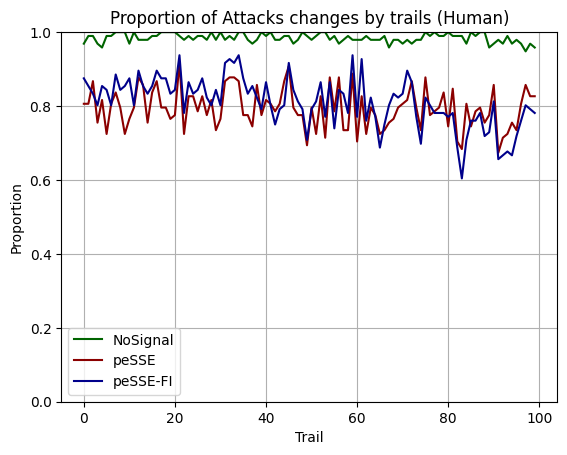

In [ ]:
# Human data
human_nosig_prop = list(pd.read_csv("human_NoSig.csv")["mean_attack"])
human_pesse_prop = list(pd.read_csv("human_peSSE.csv")["mean_attack"])
human_pesse_fi_prop = list(pd.read_csv("human_peSSE_FI.csv")["mean_attack"])
plot_time_series(human_nosig_prop, human_pesse_prop, human_pesse_fi_prop, title="Proportion of Attacks changes by trails (Human)")

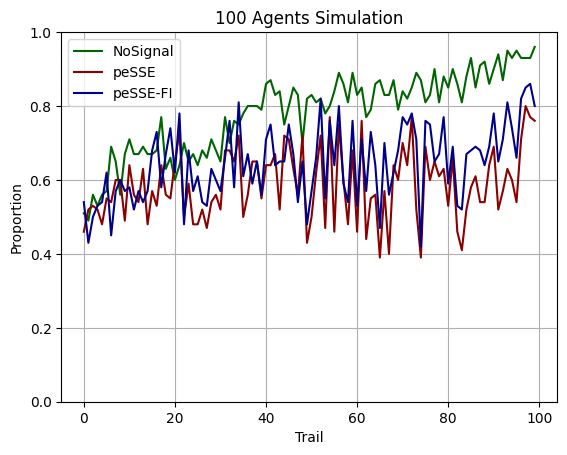

In [ ]:
# iBL simulated data
# 100 AGENTS
props1 = simulate_x_agents(agent1, agent2, play_once_nosig,x=100)
props2 = simulate_x_agents(agent1, agent3, play_once_pesse,x=100)
props3 = simulate_x_agents(agent1, agent4,play_once_pesse_f1,x=100)
plot_time_series(props1,props2,props3,title="100 Agents Simulation")

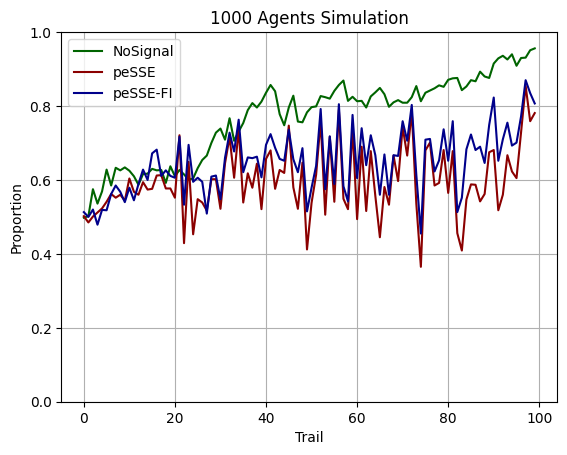

In [ ]:
# iBL simulated data
# 1000 AGENTS
props1 = simulate_x_agents(agent1, agent2, play_once_nosig)
props2 = simulate_x_agents(agent1, agent3, play_once_pesse)
props3 = simulate_x_agents(agent1, agent4,play_once_pesse_f1)
plot_time_series(props1,props2,props3,title="1000 Agents Simulation")

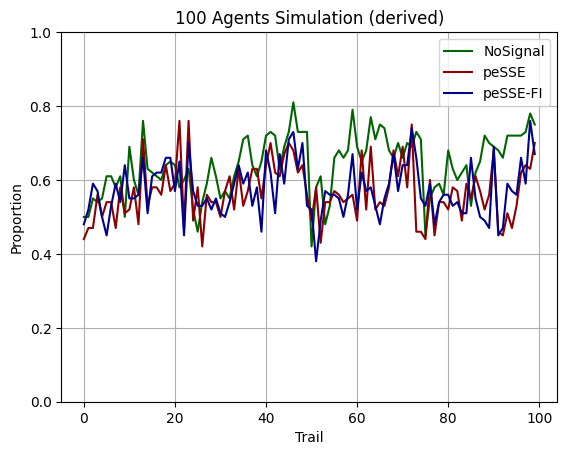

In [ ]:
# if do not inherent the memory in previous round
props1 = simulate_x_agents_derived(agent1, agent2, play_once_nosig,x=100)
props2 = simulate_x_agents_derived(agent1, agent3, play_once_pesse,x=100)
props3 = simulate_x_agents_derived(agent1, agent4,play_once_pesse_f1,x=100)
plot_time_series(props1,props2,props3,title="100 Agents Simulation (derived)")

In [ ]:
# with more proper pre-populated data
# Two stage decision making
# Target Selection Agent
agent11 = Agent(attributes=["r-value","p-value","m-prob"],
                    mismatch_penalty=0.25, decay=0.5, default_utility_populates=True)
# pre-populate the best results
agent11.populate([list(R1T1.values())],R1T1['r-value'])
agent11.populate([list(R1T2.values())],R1T2['r-value'])
agent11.populate([list(R1T3.values())],R1T3['r-value'])
agent11.populate([list(R1T4.values())],R1T4['r-value'])
agent11.populate([list(R1T5.values())],R1T5['r-value'])
agent11.populate([list(R1T6.values())],R1T6['r-value'])

agent11.populate([list(R2T1.values())],R2T1['r-value'])
agent11.populate([list(R2T2.values())],R2T2['r-value'])
agent11.populate([list(R2T3.values())],R2T3['r-value'])
agent11.populate([list(R2T4.values())],R2T4['r-value'])
agent11.populate([list(R2T5.values())],R2T5['r-value'])
agent11.populate([list(R2T6.values())],R2T6['r-value'])

agent11.populate([list(R3T1.values())],R3T1['r-value'])
agent11.populate([list(R3T2.values())],R3T2['r-value'])
agent11.populate([list(R3T3.values())],R3T3['r-value'])
agent11.populate([list(R3T4.values())],R3T4['r-value'])
agent11.populate([list(R3T5.values())],R3T5['r-value'])
agent11.populate([list(R3T6.values())],R3T6['r-value'])

agent11.populate([list(R4T1.values())],R4T1['r-value'])
agent11.populate([list(R4T2.values())],R4T2['r-value'])
agent11.populate([list(R4T3.values())],R4T3['r-value'])
agent11.populate([list(R4T4.values())],R4T4['r-value'])
agent11.populate([list(R4T5.values())],R4T5['r-value'])
agent11.populate([list(R4T6.values())],R4T6['r-value'])

agent11.instances()


+---------+---------+--------+---------+---------+-------------+
| r-value | p-value | m-prob | outcome | created | occurrences |
+---------+---------+--------+---------+---------+-------------+
|    2    |    -1   |  0.22  |    2    |    0    |     [0]     |
|    8    |    -5   |  0.51  |    8    |    0    |     [0]     |
|    9    |    -9   |  0.42  |    9    |    0    |     [0]     |
|    9    |   -10   |  0.4   |    9    |    0    |     [0]     |
|    2    |    -6   |  0.08  |    2    |    0    |     [0]     |
|    5    |    -5   |  0.36  |    5    |    0    |     [0]     |
|    5    |    -3   |  0.41  |    5    |    0    |     [0]     |
|    8    |    -5   |  0.48  |    8    |    0    |     [0]     |
|    7    |    -6   |  0.41  |    7    |    0    |     [0]     |
|    8    |    -9   |  0.37  |    8    |    0    |     [0]     |
|    5    |    -7   |  0.27  |    5    |    0    |     [0]     |
|    2    |    -4   |  0.05  |    2    |    0    |     [0]     |
|    3    |    -3   |  0.

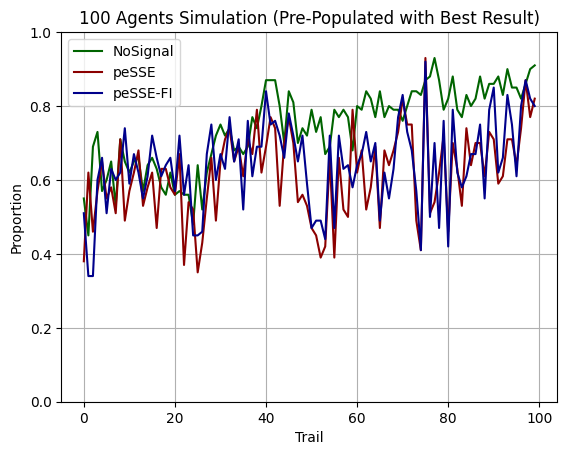

In [ ]:
props11 = simulate_x_agents(agent11, agent2, play_once_nosig,x=100)
props21 = simulate_x_agents(agent11, agent3, play_once_pesse,x=100)
props31 = simulate_x_agents(agent11, agent4,play_once_pesse_f1,x=100)
plot_time_series(props11,props21,props31,title="100 Agents Simulation (Pre-Populated with Best Result)")

In [ ]:
# with more proper pre-populated data
# Two stage decision making
# Target Selection Agent
agent12 = Agent(attributes=["r-value","p-value","m-prob"],
                    mismatch_penalty=0.25, decay=0.5, default_utility_populates=True)
# pre-populate the best results
agent12.populate([list(R1T1.values())],R1T1['p-value'])
agent12.populate([list(R1T2.values())],R1T2['p-value'])
agent12.populate([list(R1T3.values())],R1T3['p-value'])
agent12.populate([list(R1T4.values())],R1T4['p-value'])
agent12.populate([list(R1T5.values())],R1T5['p-value'])
agent12.populate([list(R1T6.values())],R1T6['p-value'])

agent12.populate([list(R2T1.values())],R2T1['p-value'])
agent12.populate([list(R2T2.values())],R2T2['p-value'])
agent12.populate([list(R2T3.values())],R2T3['p-value'])
agent12.populate([list(R2T4.values())],R2T4['p-value'])
agent12.populate([list(R2T5.values())],R2T5['p-value'])
agent12.populate([list(R2T6.values())],R2T6['p-value'])

agent12.populate([list(R3T1.values())],R3T1['p-value'])
agent12.populate([list(R3T2.values())],R3T2['p-value'])
agent12.populate([list(R3T3.values())],R3T3['p-value'])
agent12.populate([list(R3T4.values())],R3T4['p-value'])
agent12.populate([list(R3T5.values())],R3T5['p-value'])
agent12.populate([list(R3T6.values())],R3T6['p-value'])

agent12.populate([list(R4T1.values())],R4T1['p-value'])
agent12.populate([list(R4T2.values())],R4T2['p-value'])
agent12.populate([list(R4T3.values())],R4T3['p-value'])
agent12.populate([list(R4T4.values())],R4T4['p-value'])
agent12.populate([list(R4T5.values())],R4T5['p-value'])
agent12.populate([list(R4T6.values())],R4T6['p-value'])

agent12.instances()

+---------+---------+--------+---------+---------+-------------+
| r-value | p-value | m-prob | outcome | created | occurrences |
+---------+---------+--------+---------+---------+-------------+
|    2    |    -1   |  0.22  |    -1   |    0    |     [0]     |
|    8    |    -5   |  0.51  |    -5   |    0    |     [0]     |
|    9    |    -9   |  0.42  |    -9   |    0    |     [0]     |
|    9    |   -10   |  0.4   |   -10   |    0    |     [0]     |
|    2    |    -6   |  0.08  |    -6   |    0    |     [0]     |
|    5    |    -5   |  0.36  |    -5   |    0    |     [0]     |
|    5    |    -3   |  0.41  |    -3   |    0    |     [0]     |
|    8    |    -5   |  0.48  |    -5   |    0    |     [0]     |
|    7    |    -6   |  0.41  |    -6   |    0    |     [0]     |
|    8    |    -9   |  0.37  |    -9   |    0    |     [0]     |
|    5    |    -7   |  0.27  |    -7   |    0    |     [0]     |
|    2    |    -4   |  0.05  |    -4   |    0    |     [0]     |
|    3    |    -3   |  0.

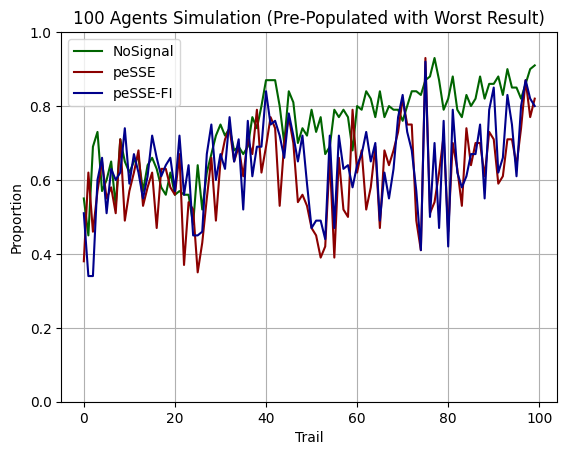

In [ ]:
props12 = simulate_x_agents(agent12, agent2, play_once_nosig,x=100)
props22 = simulate_x_agents(agent12, agent3, play_once_pesse,x=100)
props32 = simulate_x_agents(agent12, agent4,play_once_pesse_f1,x=100)
plot_time_series(props11,props21,props31,title="100 Agents Simulation (Pre-Populated with Worst Result)")

In [ ]:
# with more proper pre-populated data
# Two stage decision making
# Target Selection Agent
agent13 = Agent(attributes=["r-value","p-value","m-prob"],
                    mismatch_penalty=0.25, decay=0.5, default_utility_populates=True)
# pre-populate the best results
agent13.populate([list(R1T1.values())],R1T1['p-value']+R1T1['r-value'])
agent13.populate([list(R1T2.values())],R1T2['p-value']+R1T2['r-value'])
agent13.populate([list(R1T3.values())],R1T3['p-value']+R1T3['r-value'])
agent13.populate([list(R1T4.values())],R1T4['p-value']+R1T4['r-value'])
agent13.populate([list(R1T5.values())],R1T5['p-value']+R1T5['r-value'])
agent13.populate([list(R1T6.values())],R1T6['p-value']+R1T6['r-value'])

agent13.populate([list(R2T1.values())],R2T1['p-value']+R2T1['r-value'])
agent13.populate([list(R2T2.values())],R2T2['p-value']+R2T2['r-value'])
agent13.populate([list(R2T3.values())],R2T3['p-value']+R2T3['r-value'])
agent13.populate([list(R2T4.values())],R2T4['p-value']+R2T4['r-value'])
agent13.populate([list(R2T5.values())],R2T5['p-value']+R2T5['r-value'])
agent13.populate([list(R2T6.values())],R2T6['p-value']+R2T6['r-value'])

agent13.populate([list(R3T1.values())],R3T1['p-value']+R3T1['r-value'])
agent13.populate([list(R3T2.values())],R3T2['p-value']+R3T2['r-value'])
agent13.populate([list(R3T3.values())],R3T3['p-value']+R3T3['r-value'])
agent13.populate([list(R3T4.values())],R3T4['p-value']+R3T4['r-value'])
agent13.populate([list(R3T5.values())],R3T5['p-value']+R3T5['r-value'])
agent13.populate([list(R3T6.values())],R3T6['p-value']+R3T6['r-value'])

agent13.populate([list(R4T1.values())],R4T1['p-value']+R4T1['r-value'])
agent13.populate([list(R4T2.values())],R4T2['p-value']+R4T2['r-value'])
agent13.populate([list(R4T3.values())],R4T3['p-value']+R4T3['r-value'])
agent13.populate([list(R4T4.values())],R4T4['p-value']+R4T4['r-value'])
agent13.populate([list(R4T5.values())],R4T5['p-value']+R4T5['r-value'])
agent13.populate([list(R4T6.values())],R4T6['p-value']+R4T6['r-value'])

agent13.instances()

+---------+---------+--------+---------+---------+-------------+
| r-value | p-value | m-prob | outcome | created | occurrences |
+---------+---------+--------+---------+---------+-------------+
|    2    |    -1   |  0.22  |    1    |    0    |     [0]     |
|    8    |    -5   |  0.51  |    3    |    0    |     [0]     |
|    9    |    -9   |  0.42  |    0    |    0    |     [0]     |
|    9    |   -10   |  0.4   |    -1   |    0    |     [0]     |
|    2    |    -6   |  0.08  |    -4   |    0    |     [0]     |
|    5    |    -5   |  0.36  |    0    |    0    |     [0]     |
|    5    |    -3   |  0.41  |    2    |    0    |     [0]     |
|    8    |    -5   |  0.48  |    3    |    0    |     [0]     |
|    7    |    -6   |  0.41  |    1    |    0    |     [0]     |
|    8    |    -9   |  0.37  |    -1   |    0    |     [0]     |
|    5    |    -7   |  0.27  |    -2   |    0    |     [0]     |
|    2    |    -4   |  0.05  |    -2   |    0    |     [0]     |
|    3    |    -3   |  0.

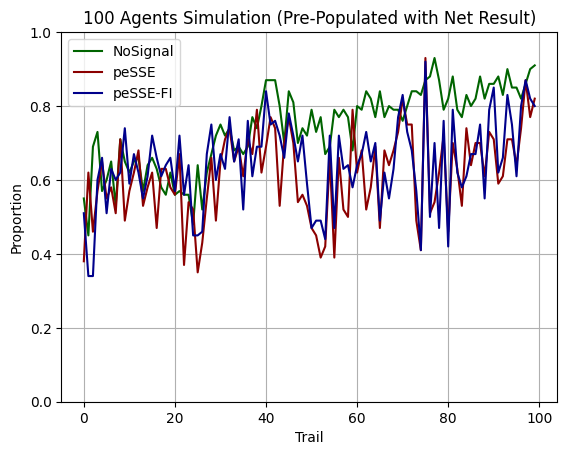

In [ ]:
props13 = simulate_x_agents(agent13, agent2, play_once_nosig,x=100)
props23 = simulate_x_agents(agent13, agent3, play_once_pesse,x=100)
props33 = simulate_x_agents(agent13, agent4,play_once_pesse_f1,x=100)
plot_time_series(props11,props21,props31,title="100 Agents Simulation (Pre-Populated with Net Result)")

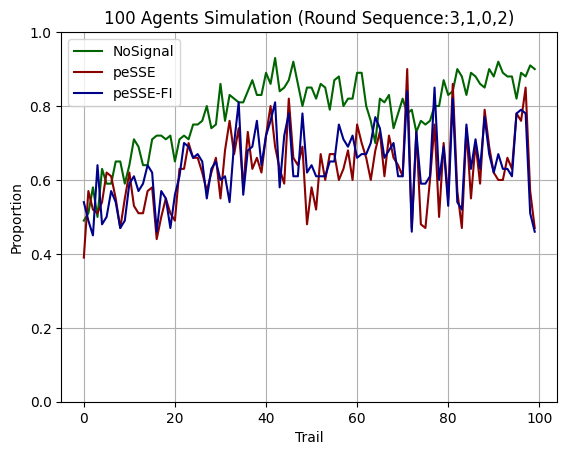

In [ ]:
props1 = simulate_x_agents_x(agent1, agent2, play_once_nosig,x=100)
props2 = simulate_x_agents_x(agent1, agent3, play_once_pesse,x=100)
props3 = simulate_x_agents_x(agent1, agent4,play_once_pesse_f1,x=100)
plot_time_series(props1,props2,props3,title="100 Agents Simulation (Round Sequence:3,1,0,2)")


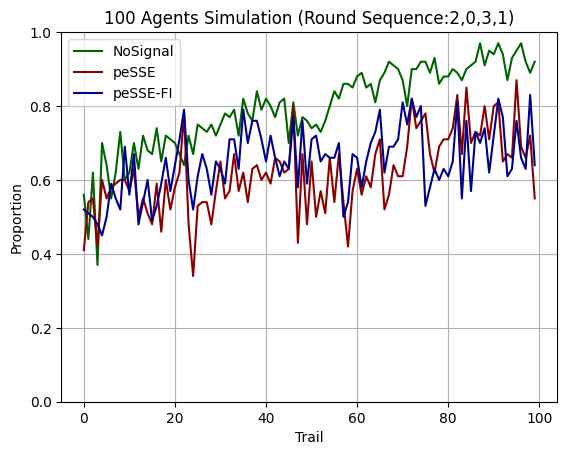

In [ ]:
props1 = simulate_x_agents_x(agent1, agent2, play_once_nosig, round_seq=[2,0,3,1], x=100)
props2 = simulate_x_agents_x(agent1, agent3, play_once_pesse, round_seq=[2,0,3,1], x=100)
props3 = simulate_x_agents_x(agent1, agent4,play_once_pesse_f1, round_seq=[2,0,3,1], x=100)
plot_time_series(props1,props2,props3,title="100 Agents Simulation (Round Sequence:2,0,3,1)")